In [11]:
import pandas as pd
import torch
from sklearn.metrics import f1_score
import seaborn as sns
import models
import importlib
importlib.reload(models)

from models import LSTMNet, LSTMDataset, predict, post_analysis, post_analysis_subgroups
import importlib

In [1]:
training_data_path = 'train_data_with_na.pkl'
test_data_path = 'test_data_with_na.pkl'

In [3]:
# load the files
df_train = pd.read_pickle(training_data_path)
df_test = pd.read_pickle(test_data_path)

#complete na values
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_train.mean())

/tmp/ipykernel_577815/1463548971.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())
/tmp/ipykernel_577815/1463548971.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_train.mean())


In [4]:
model_concat = LSTMNet(type='concat')
model_concat.load_state_dict(torch.load('/home/student/Data-analysis-and-presentation/HW1/weights/concat_0.69.pt'))

<All keys matched successfully>

## Post Analysis

In order to check which features are important we'll blank selected features (set all of thier values to 0) and check the F1 score afterwards 

In [11]:
test_ds.df.columns

Index(['index', 'SepsisLabel', 'age', 'gender', 'unit1', 'unit2',
       'unknown unit', 'HospAdmTime', 'Final ICULOS', 'HR_series',
       'Resp_series', 'MAP_series', 'O2Sat_series', 'SBP_series', 'Temp_var',
       'Temp_mean', 'WBC_not_null', 'WBC_mean', 'Lactate_not_null',
       'BaseExcess_not_null'],
      dtype='object')

In [5]:
test_ds = LSTMDataset(df_test.sample(2000))

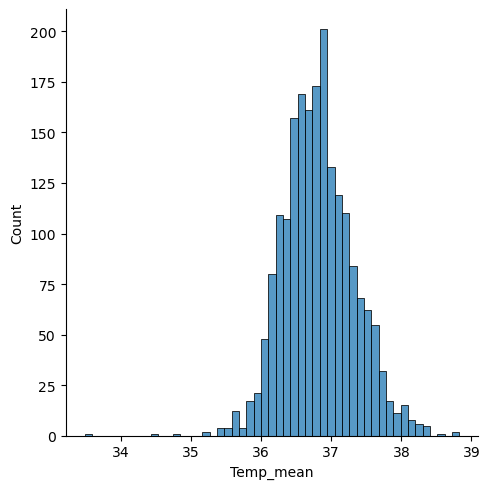

In [15]:
sns.displot(test_ds.df, x="Temp_mean")

In [11]:
post_analysis(test_ds, 'Final ICULOS', model_concat, lambda x: max(x-30, 0), 'Final ICULOS')

{'standart': 0.6551724137931035, 'after': 0.6493506493506492}

In [18]:
post_analysis(test_ds, 'Temp_mean', model_concat, lambda x: x+3, 'Temp_mean')

{'standart': 0.6551724137931035, 'after': 0.6363636363636364}

In [18]:
post_analysis(test_ds, 'gender', model_concat, lambda x: 1 if x == 0 else 0, 'gender')

{'standart': 0.6850393700787403, 'after': 0.6772908366533864}

In [12]:
men_ds = LSTMDataset(df_test[df_test['gender'] == 1].sample(2000))
women_ds = LSTMDataset(df_test[df_test['gender'] == 0].sample(2000))
post_analysis_subgroups(ds1=men_ds, ds2=women_ds, model=model_concat, graph_name1='Men', graph_name2='Women')

{'Men': 0.6981818181818181, 'Women': 0.660377358490566}

In [13]:
unit1_ds = LSTMDataset(df_test[df_test['unit1'] == 1].sample(1000))
unit2_ds = LSTMDataset(df_test[df_test['unit2'] == 1].sample(1000))
post_analysis_subgroups(ds1=unit1_ds, ds2=unit2_ds, model=model_concat, graph_name1='unit1', graph_name2='unit2')

{'unit1': 0.6355140186915887, 'unit2': 0.7358490566037735}

In [15]:
unit_ds = LSTMDataset(df_test[df_test['unknown unit'] == 0].sample(1000))
no_unit_ds = LSTMDataset(df_test[df_test['unknown unit'] == 1].sample(1000))
post_analysis_subgroups(ds1=unit_ds, ds2=no_unit_ds, model=model_concat, graph_name1='with_unit', graph_name2='unknown_unit')

{'with_unit': 0.6923076923076923, 'unknown_unit': 0.7435897435897436}